# MNIST

## Import the Libraries

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from IPython.display import Image

2024-05-10 14:42:30.786203: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/gabrielmarcellinojoestiawan/opt/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data

In [2]:
mnist_dataset,mnist_info =  tfds.load(name="mnist",with_info=True,as_supervised=True)

### Preporcessing

#### Create Train Set, Test Set, and Validation Set from Train Set

In [3]:
mnist_train,mnist_test =mnist_dataset['train'],mnist_dataset['test']

# Making validation set with 10% of data train
num_val_samples = 0.1 * mnist_info.splits['train'].num_examples
num_val_samples = tf.cast(num_val_samples,tf.int64)

# Making test set
num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples,tf.int64)

In [4]:
# Scaling Function

def scale(image,label):
    image = tf.cast(image,tf.float32)
    # The value of data is 0 to 255
    # to make it the range 0 to 1 we divided by 255
    image /= 255.
    return image,label

note : you can use other scale function if it fits. <br>
as long it returns image and the label

In [5]:
# Scaled Data

scaled_train = mnist_train.map(scale)
scaled_test = mnist_test.map(scale)

<b> Shuffle and Batch </b><br>
shuffling : keeping the same information in different order

In [6]:
# Set the sampling size in one shuffling
BUFFER_SIZE = 10000


# Shuffle
shuffled_train = scaled_train.shuffle(BUFFER_SIZE)

shuffled_test = scaled_train.shuffle(BUFFER_SIZE)

# Create validation
validation = shuffled_train.take(num_val_samples)
# Train set includes all data but validation samples
train = shuffled_train.skip(num_val_samples)

test = shuffled_test.take(num_test_samples)

# Batch
# Indices the data to fasten the processing
# Useful in updating weights in back propagating on one update per batch

BATCH_SIZE = 100 #Hyperparameter

'''
When batching, we find average loss and average accuraccy

'''

train = train.batch(BATCH_SIZE) # Batching the data with 100 batches

validation = validation.batch(num_val_samples) # We batch the validation but doesn't change anything

'''
Validation set only does forward propagation and not back propagation
'''

test = test.batch(num_test_samples)

'''
With this batching, it will create a new column with how much sample it takes for each batch
'''

'\nWith this batching, it will create a new column with how much sample it takes for each batch\n'

note : MNIST Data is iterable and in 2-tuple format (as_supervised=True)

In [7]:

'''
iter() : it makes the data iterable
next() : go to the next batch
'''
# Because validation only has 1 batch, val_input and val_target will only simultaneously
val_input,val_target = next(iter(validation))

2024-05-10 14:42:38.099656: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


### Model

#### Outline the Model

In [8]:
# Declare the input size, target size, hidden layer size

# The size of matrix is 28 x 28
input_size = 784
# The target size consist 10 digits 0 to 9
target_size = 10
# hidden layer size 50 for width 2
hidden_layer_size = 50

# Model Neural Network
model = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape =(28,28,1)), # Input
                                #dataset.Flatten() : transforms a tensor into a vector
                                tf.keras.layers.Dense(hidden_layer_size,activation='relu'), # 1st Hideen Layer
                                tf.keras.layers.Dense(hidden_layer_size,activation='relu'), # 2st Hideen Layer
                                tf.keras.layers.Dense(target_size,activation='softmax') # Target
                            ])

/Users/gabrielmarcellinojoestiawan/opt/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Choose the Optimizer and the Loss Function

In [9]:

'''

model.compile(optimizer,loss,metrics) : configures the model for training

there are 3 buildin loss cross entropy :
1. binnary_crossentropy : we got binary encoding
2. categorical_crossentropy : expected targets are already one-hot encoded
3. sparse_categorical_crossentropy : applies one-hot encoded

Metrics : A metric is a function that is used to judge the performance of your model
'''
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Training <br>
using validation data

Fitting the Data

In [15]:
NUM_EPOCHS = 10
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model.fit(train,epochs = NUM_EPOCHS,callbacks= early_stopping,validation_data =(val_input,val_target),verbose=2)

epoch_explained = '''
left to right

how many batches - waktu buat epoch bekerja - training loss - accuracy - vall accuracy - val loss
'''

print(epoch_explained)

Epoch 1/10
540/540 - 2s - 3ms/step - accuracy: 0.9762 - loss: 0.0783 - val_accuracy: 0.9752 - val_loss: 0.0849
Epoch 2/10
540/540 - 2s - 3ms/step - accuracy: 0.9792 - loss: 0.0701 - val_accuracy: 0.9757 - val_loss: 0.0812
Epoch 3/10
540/540 - 2s - 3ms/step - accuracy: 0.9815 - loss: 0.0610 - val_accuracy: 0.9798 - val_loss: 0.0724
Epoch 4/10
540/540 - 2s - 3ms/step - accuracy: 0.9837 - loss: 0.0542 - val_accuracy: 0.9797 - val_loss: 0.0689
Epoch 5/10
540/540 - 2s - 4ms/step - accuracy: 0.9849 - loss: 0.0493 - val_accuracy: 0.9808 - val_loss: 0.0638
Epoch 6/10
540/540 - 2s - 4ms/step - accuracy: 0.9860 - loss: 0.0456 - val_accuracy: 0.9843 - val_loss: 0.0584
Epoch 7/10
540/540 - 2s - 4ms/step - accuracy: 0.9888 - loss: 0.0380 - val_accuracy: 0.9830 - val_loss: 0.0543
Epoch 8/10
540/540 - 2s - 4ms/step - accuracy: 0.9894 - loss: 0.0345 - val_accuracy: 0.9848 - val_loss: 0.0494
Epoch 9/10
540/540 - 2s - 4ms/step - accuracy: 0.9903 - loss: 0.0318 - val_accuracy: 0.9847 - val_loss: 0.0462
E

In [11]:
Image(url="what happened inside epoch.png")

### Test the Model

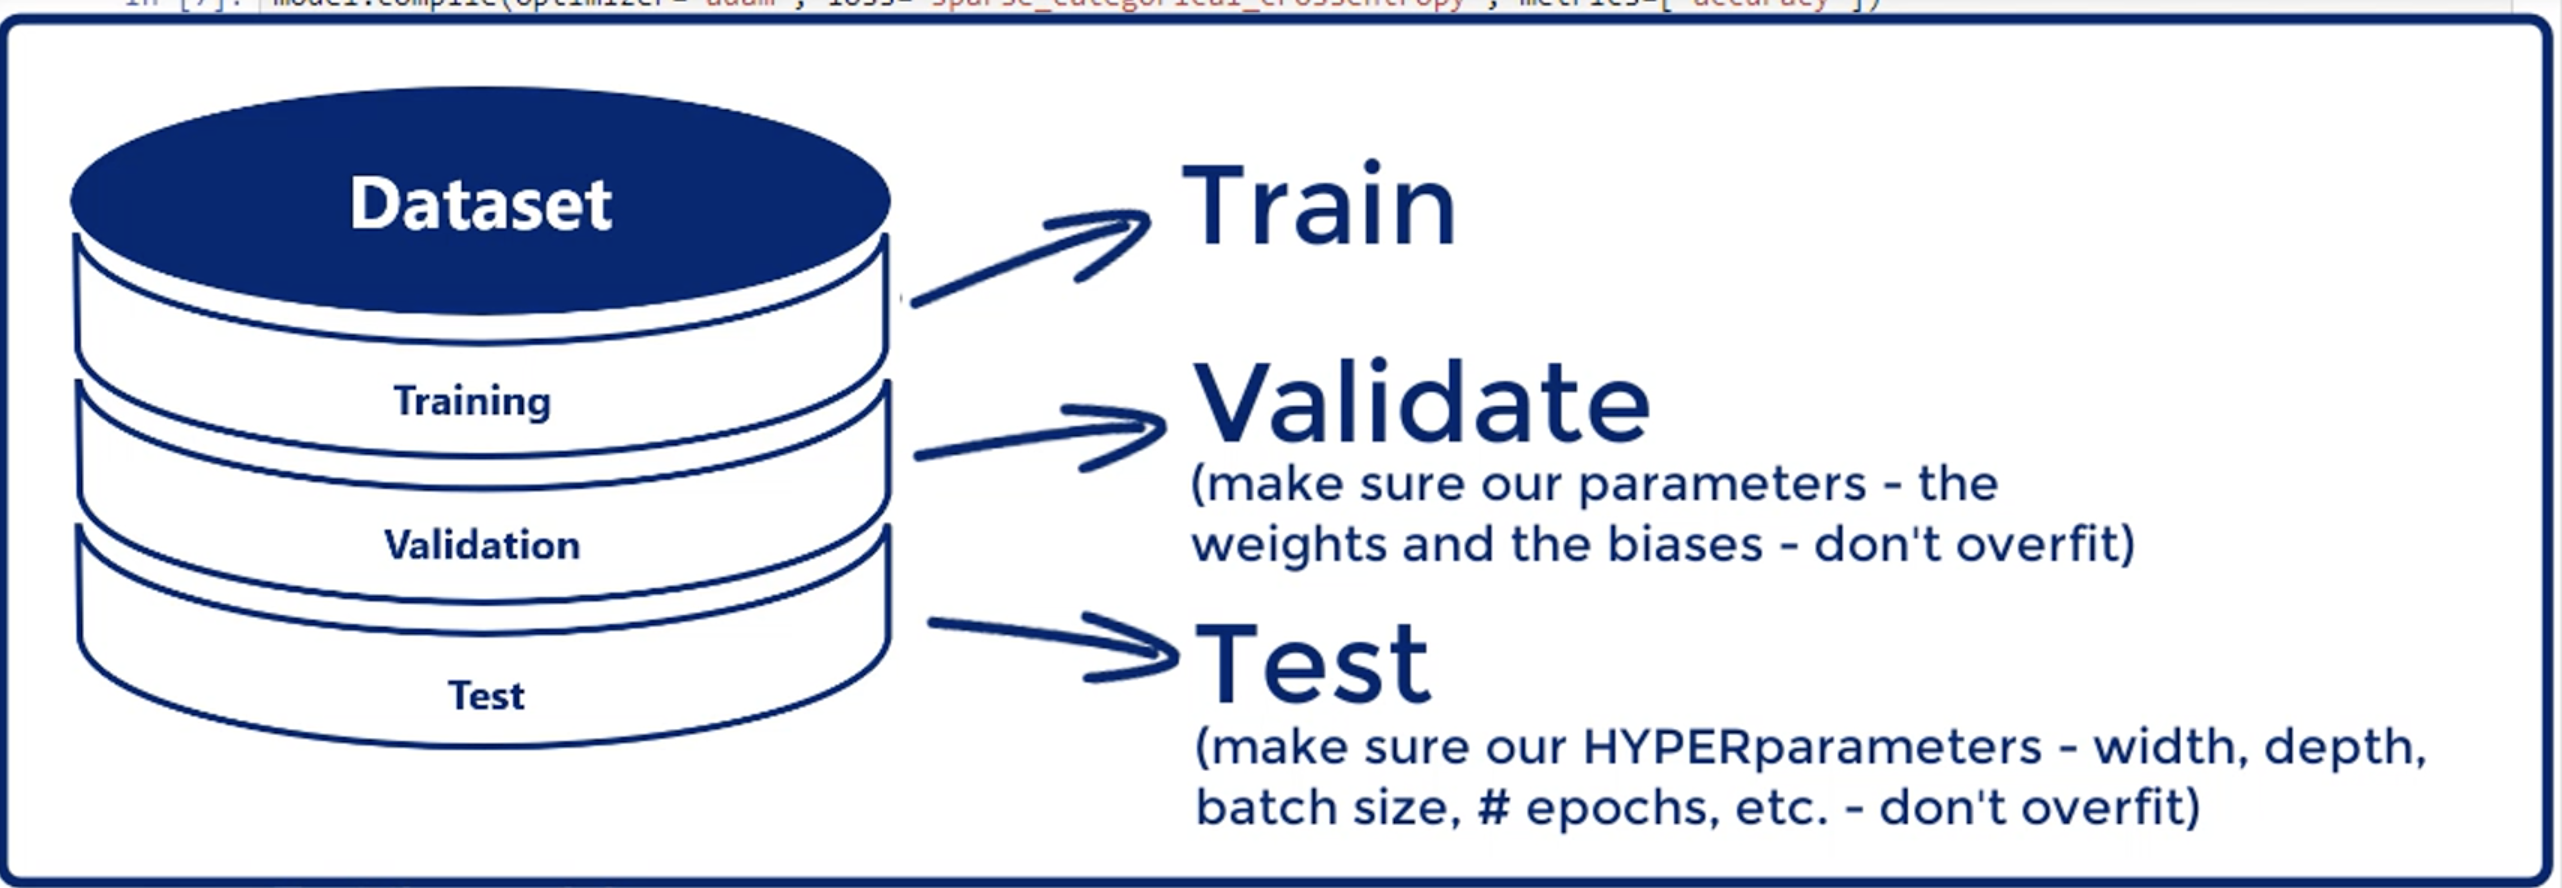

In [12]:
Image("train,val,test.png")

In [13]:
# model.evaluate() -> returns loss values and metrics values for the model in 'test model'

test_loss,test_accuracy = model.evaluate(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.9712 - loss: 0.0924


In [14]:
print(f"Test Loss : {test_loss * 100}, Test Acc : {test_accuracy * 100}.")

Test Loss : 9.24389436841011, Test Acc : 97.11999893188477.
